### T-Test Random Key

In [1]:
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np
import scipy
from tqdm import tnrange,tqdm_notebook
import matplotlib.pyplot as plt
from scipy.stats import t
import matplotlib.pyplot as plt

In [2]:
df_data1 = pd.read_csv('../DataFactory/FixedPlaintext/FPFK.csv')
df_data1 = df_data1.drop(['label'],axis=1)

### T-Test 

In [3]:
def myMean(data):
    return data.mean()

In [4]:
def myStd(data):
    return data.std()

In [5]:
def tMean(data1,data2):
    return(data1 - data2)

In [6]:
def tSN(std,n):
    return(std**2/len(n))

In [7]:
def ttestCalc(mean1,mean2,std1,std2,data1,data2):
    tv = (tMean(mean1,mean2)) / (np.sqrt(tSN(std1,data1) + tSN(std2,data2)))
    return(np.abs(tv))

In [8]:
def tTest(data1,data2,tLeng):
    arr_collect_All=[]
    mean1 = myMean(data1)
    mean2 = myMean(data2)
    std1 = myStd(data1)
    std2 = myStd(data2)
    for j in range(0,tLeng):
        arr_collect=[]
        for i in range(0,tLeng):
            arr_collect.append(ttestCalc(mean1[j],mean2[i],std1[j],std2[i],data1,data2))
        arr_collect_All.append(np.amax(arr_collect))
    return(arr_collect_All)

### Degree of freedom

In [9]:
def vS2(data1,data2,std1,std2):    
    s22 = (tSN(std1,data1) + tSN(std2,data2))**2
    return(s22)

In [10]:
def df(data1,data2):
    
    std1 = myStd(data1)
    std2 = myStd(data2)
    
    s22 = vS2(data1,data2,std1,std2)
    
    term1 = (std1**2 / (len(data1)))**2 / (len(data1) - 1)
    term2 = (std2**2 / (len(data2)))**2 / (len(data2) - 1)

    v = s22 / (term1 + term2)
    
    return(v)

### CDF

In [11]:
def cdf(data1,data2):
    cdf_array = []
    
    colLen = df_data1.shape[1]
    
    tV = tTest(data1,data2,colLen)
    v = df(data1,data2)
    
    
    print("t-value",tV[24])
    print("v-value",v[24])
    
    for i in range(0,colLen):
        cdf_array.append(t.cdf(-1 *(tV[i]),v[i]))
        
    return(cdf_array)

### T-Test TS1

In [12]:
numTraceT1 = 1000

In [13]:
df_fpT1 = df_data1[0:numTraceT1]

In [14]:
df_dataT1 = pd.read_csv('../DataFactory/RandomPlaintext/TS1.csv')
df_dataT1 = df_dataT1.drop(['label'],axis=1)
df_dataT1 = df_dataT1[0:numTraceT1]

t-value 4.755369222728808
v-value 1996.911719689363


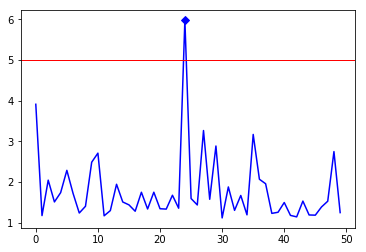

In [15]:
plt.plot(-np.log10(cdf(df_fpT1,df_dataT1)),'-bD',markevery=[24])
plt.axhline(y=5.0, xmin=0, xmax=1, color='r', linestyle='-', lw=1)
plt.show()

### T-Test TS2

In [16]:
numTraceT2 = 1000

In [17]:
df_fpT2 = df_data1[0:numTraceT2]

In [18]:
df_dataT2 = pd.read_csv('../DataFactory/RandomPlaintext/TS2.csv')
df_dataT2 = df_dataT2.drop(['label'],axis=1)
df_dataT2 = df_dataT2[0:numTraceT2]

t-value 5.013173418899697
v-value 1997.9938366975537


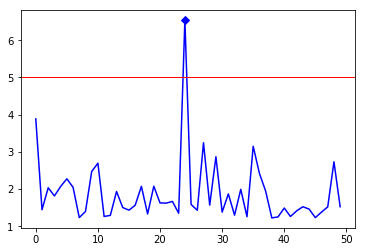

In [19]:
plt.plot(-np.log10(cdf(df_fpT2,df_dataT2)),'-bD',markevery=[24])
plt.axhline(y=5.0, xmin=0, xmax=1, color='r', linestyle='-', lw=1)
plt.show()

### T-Test TS3

In [20]:
numTraceT3 = 1000

In [21]:
df_fpT3 = df_data1[0:numTraceT3]

In [22]:
df_dataT3 = pd.read_csv('../DataFactory/RandomPlaintext/TS3.csv')
df_dataT3 = df_dataT3.drop(['label'],axis=1)
df_dataT3 = df_dataT3[0:numTraceT3]

t-value 4.9677225550056505
v-value 1997.6599371405198


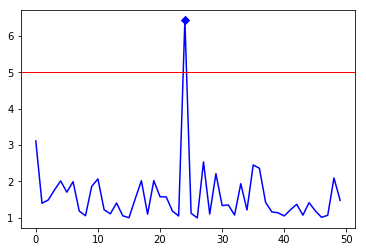

In [23]:
plt.plot(-np.log10(cdf(df_fpT3,df_dataT3)),'-bD',markevery=[24])
plt.axhline(y=5.0, xmin=0, xmax=1, color='r', linestyle='-', lw=1)
plt.show()

### T-Test TS4

In [24]:
numTraceT4 = 1000

In [25]:
df_fpT4 = df_data1[0:numTraceT4]

In [26]:
df_dataT4 = pd.read_csv('../DataFactory/RandomPlaintext/TS4.csv')
df_dataT4 = df_dataT4.drop(['label'],axis=1)
df_dataT4 = df_dataT4[0:numTraceT4]

t-value 5.346238553371277
v-value 1997.9999679061816


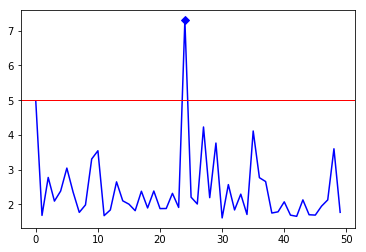

In [27]:
plt.plot(-np.log10(cdf(df_fpT4,df_dataT4)),'-bD',markevery=[24])
plt.axhline(y=5.0, xmin=0, xmax=1, color='r', linestyle='-', lw=1)
plt.show()

### T-Test TS5

In [28]:
numTraceT5 = 1000

In [29]:
df_fpT5 = df_data1[0:numTraceT5]

In [30]:
df_dataT5 = pd.read_csv('../DataFactory/RandomPlaintext/TS5.csv')
df_dataT5 = df_dataT5.drop(['label'],axis=1)
df_dataT5 = df_dataT5[0:numTraceT5]

t-value 5.1042738006334485
v-value 1995.8606960538386


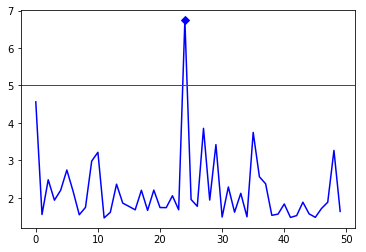

In [31]:
plt.plot(-np.log10(cdf(df_fpT5,df_dataT5)),'-bD',markevery=[24])
plt.axhline(y=5.0, xmin=0, xmax=1, color='r', linestyle='-', lw=1)
plt.show()

### T-Test TS6

In [32]:
numTraceT6 = 1000

In [33]:
df_fpT6 = df_data1[0:numTraceT6]

In [34]:
df_dataT6 = pd.read_csv('../DataFactory/RandomPlaintext/TS6.csv')
df_dataT6 = df_dataT6.drop(['label'],axis=1)
df_dataT6 = df_dataT6[0:numTraceT6]

t-value 5.290229048467267
v-value 1996.761919368891


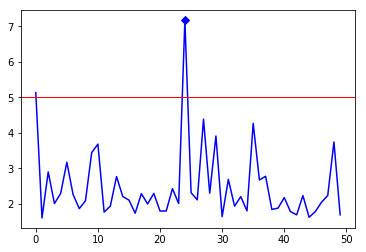

In [35]:
plt.plot(-np.log10(cdf(df_fpT6,df_dataT6)),'-bD',markevery=[24])
plt.axhline(y=5.0, xmin=0, xmax=1, color='r', linestyle='-', lw=1)
plt.show()

### T-Test TS7

In [36]:
numTraceT7 = 1000

In [37]:
df_fpT7 = df_data1[0:numTraceT7]

In [38]:
df_dataT7 = pd.read_csv('../DataFactory/RandomPlaintext/TS7.csv')
df_dataT7 = df_dataT7.drop(['label'],axis=1)
df_dataT7 = df_dataT7[0:numTraceT7]

t-value 5.086919261451209
v-value 1997.8671325310272


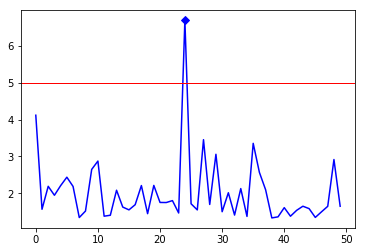

In [39]:
plt.plot(-np.log10(cdf(df_fpT7,df_dataT7)),'-bD',markevery=[24])
plt.axhline(y=5.0, xmin=0, xmax=1, color='r', linestyle='-', lw=1)
plt.show()

### T-Test TS8

In [40]:
numTraceT8 = 1000

In [41]:
df_fpT8 = df_data1[0:numTraceT8]

In [42]:
df_dataT8 = pd.read_csv('../DataFactory/RandomPlaintext/TS8.csv')
df_dataT8 = df_dataT8.drop(['label'],axis=1)
df_dataT8 = df_dataT8[0:numTraceT8]

t-value 4.943159303315882
v-value 1996.6424040085137


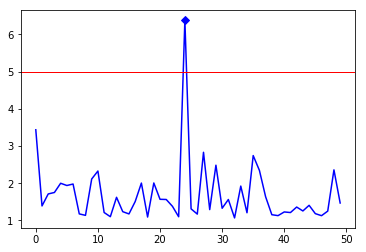

In [43]:
plt.plot(-np.log10(cdf(df_fpT8,df_dataT8)),'-bD',markevery=[24])
plt.axhline(y=5.0, xmin=0, xmax=1, color='r', linestyle='-', lw=1)
plt.show()